In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("D:/game/AirlinesDATA/2018NEW.csv")

In [3]:
df.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
0,1/1/2018,UA,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,1712.0,10.0,1745,1722.0,-23.0,268.0,250.0,225.0,1605
1,1/1/2018,UA,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,1223.0,7.0,1254,1230.0,-24.0,99.0,83.0,65.0,414
2,1/1/2018,UA,2426,SNA,DEN,1335,1330.0,-5.0,15.0,1345.0,1631.0,5.0,1649,1636.0,-13.0,134.0,126.0,106.0,846
3,1/1/2018,UA,2425,RSW,ORD,1546,1552.0,6.0,19.0,1611.0,1748.0,6.0,1756,1754.0,-2.0,190.0,182.0,157.0,1120
4,1/1/2018,UA,2424,ORD,ALB,630,650.0,20.0,13.0,703.0,926.0,10.0,922,936.0,14.0,112.0,106.0,83.0,723


In [4]:
df['OP_CARRIER'].replace({
    'UA':'United Airlines',
    'AS':'Alaska Airlines',
    '9E':'Endeavor Air',
    'B6':'JetBlue Airways',
    'EV':'ExpressJet',
    'F9':'Frontier Airlines',
    'G4':'Allegiant Air',
    'HA':'Hawaiian Airlines',
    'MQ':'Envoy Air',
    'NK':'Spirit Airlines',
    'OH':'PSA Airlines',
    'OO':'SkyWest Airlines',
    'VX':'Virgin America',
    'WN':'Southwest Airlines',
    'YV':'Mesa Airline',
    'YX':'Republic Airways',
    'AA':'American Airlines',
    'DL':'Delta Airlines'
},inplace=True)

In [5]:
df.OP_CARRIER.unique()

array(['United Airlines', 'Alaska Airlines', 'Endeavor Air',
       'JetBlue Airways', 'ExpressJet', 'Frontier Airlines',
       'Allegiant Air', 'Hawaiian Airlines', 'Envoy Air',
       'Spirit Airlines', 'PSA Airlines', 'SkyWest Airlines',
       'Virgin America', 'Southwest Airlines', 'Mesa Airline',
       'Republic Airways', 'American Airlines', 'Delta Airlines'],
      dtype=object)

In [6]:
df['FL_DATE'] = df['FL_DATE'].astype('str') 
df['FL_DATE'] = df['FL_DATE'].str.replace("/","")
print(df['FL_DATE'])

0           112018
1           112018
2           112018
3           112018
4           112018
            ...   
1048570    2262018
1048571    2262018
1048572    2262018
1048573    2262018
1048574    2262018
Name: FL_DATE, Length: 1048575, dtype: object


In [7]:
df['FL_DATE'] = df['FL_DATE'].astype(int)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 19 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   FL_DATE              1048575 non-null  int32  
 1   OP_CARRIER           1048575 non-null  object 
 2   OP_CARRIER_FL_NUM    1048575 non-null  int64  
 3   ORIGIN               1048575 non-null  object 
 4   DEST                 1048575 non-null  object 
 5   CRS_DEP_TIME         1048575 non-null  int64  
 6   DEP_TIME             1023321 non-null  float64
 7   DEP_DELAY            1022413 non-null  float64
 8   TAXI_OUT             1022842 non-null  float64
 9   WHEELS_OFF           1022842 non-null  float64
 10  WHEELS_ON            1021967 non-null  float64
 11  TAXI_IN              1021967 non-null  float64
 12  CRS_ARR_TIME         1048575 non-null  int64  
 13  ARR_TIME             1021967 non-null  float64
 14  ARR_DELAY            1019683 non-null  float64
 15

In [9]:
df.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
0,112018,United Airlines,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,1712.0,10.0,1745,1722.0,-23.0,268.0,250.0,225.0,1605
1,112018,United Airlines,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,1223.0,7.0,1254,1230.0,-24.0,99.0,83.0,65.0,414
2,112018,United Airlines,2426,SNA,DEN,1335,1330.0,-5.0,15.0,1345.0,1631.0,5.0,1649,1636.0,-13.0,134.0,126.0,106.0,846
3,112018,United Airlines,2425,RSW,ORD,1546,1552.0,6.0,19.0,1611.0,1748.0,6.0,1756,1754.0,-2.0,190.0,182.0,157.0,1120
4,112018,United Airlines,2424,ORD,ALB,630,650.0,20.0,13.0,703.0,926.0,10.0,922,936.0,14.0,112.0,106.0,83.0,723


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [11]:
feature_cols = ['FL_DATE',
 'OP_CARRIER',
 'OP_CARRIER_FL_NUM',
 'ORIGIN',
 'DEST',
 'CRS_DEP_TIME',
 'DEP_TIME',
 'DEP_DELAY',
 'TAXI_OUT',
 'WHEELS_OFF',
 'WHEELS_ON',
 'TAXI_IN',
 'CRS_ARR_TIME',
 'ARR_TIME',
 'CRS_ELAPSED_TIME',
 'ACTUAL_ELAPSED_TIME',
 'AIR_TIME',
 'DISTANCE']

In [12]:
#Encode label to 1 and 0 boolean
df['ARR_DELAY'][df['ARR_DELAY'] < 0] = 0
df['ARR_DELAY'][df['ARR_DELAY'] > 0] = 1
df['ARR_DELAY'] = df['ARR_DELAY'].astype('bool')

<ipython-input-12-d9f5b32011dc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ARR_DELAY'][df['ARR_DELAY'] < 0] = 0
<ipython-input-12-d9f5b32011dc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ARR_DELAY'][df['ARR_DELAY'] > 0] = 1


In [13]:
df.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
0,112018,United Airlines,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,1712.0,10.0,1745,1722.0,False,268.0,250.0,225.0,1605
1,112018,United Airlines,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,1223.0,7.0,1254,1230.0,False,99.0,83.0,65.0,414
2,112018,United Airlines,2426,SNA,DEN,1335,1330.0,-5.0,15.0,1345.0,1631.0,5.0,1649,1636.0,False,134.0,126.0,106.0,846
3,112018,United Airlines,2425,RSW,ORD,1546,1552.0,6.0,19.0,1611.0,1748.0,6.0,1756,1754.0,False,190.0,182.0,157.0,1120
4,112018,United Airlines,2424,ORD,ALB,630,650.0,20.0,13.0,703.0,926.0,10.0,922,936.0,True,112.0,106.0,83.0,723


In [14]:
#Encode categorical features to int
colsObject = ['OP_CARRIER',
 'ORIGIN',
 'DEST']

In [15]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [16]:
for col in colsObject:
    df[col] = le.fit_transform(df[col])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 19 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   FL_DATE              1048575 non-null  int32  
 1   OP_CARRIER           1048575 non-null  int32  
 2   OP_CARRIER_FL_NUM    1048575 non-null  int64  
 3   ORIGIN               1048575 non-null  int32  
 4   DEST                 1048575 non-null  int32  
 5   CRS_DEP_TIME         1048575 non-null  int64  
 6   DEP_TIME             1023321 non-null  float64
 7   DEP_DELAY            1022413 non-null  float64
 8   TAXI_OUT             1022842 non-null  float64
 9   WHEELS_OFF           1022842 non-null  float64
 10  WHEELS_ON            1021967 non-null  float64
 11  TAXI_IN              1021967 non-null  float64
 12  CRS_ARR_TIME         1048575 non-null  int64  
 13  ARR_TIME             1021967 non-null  float64
 14  ARR_DELAY            1048575 non-null  bool   
 15

In [18]:
df.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
0,112018,16,2429,104,85,1517,1512.0,-5.0,15.0,1527.0,1712.0,10.0,1745,1722.0,False,268.0,250.0,225.0,1605
1,112018,16,2427,174,291,1115,1107.0,-8.0,11.0,1118.0,1223.0,7.0,1254,1230.0,False,99.0,83.0,65.0,414
2,112018,16,2426,302,85,1335,1330.0,-5.0,15.0,1345.0,1631.0,5.0,1649,1636.0,False,134.0,126.0,106.0,846
3,112018,16,2425,277,233,1546,1552.0,6.0,19.0,1611.0,1748.0,6.0,1756,1754.0,False,190.0,182.0,157.0,1120
4,112018,16,2424,233,12,630,650.0,20.0,13.0,703.0,926.0,10.0,922,936.0,True,112.0,106.0,83.0,723


In [19]:
# Drop rows with missing values
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1019194 entries, 0 to 1048574
Data columns (total 19 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   FL_DATE              1019194 non-null  int32  
 1   OP_CARRIER           1019194 non-null  int32  
 2   OP_CARRIER_FL_NUM    1019194 non-null  int64  
 3   ORIGIN               1019194 non-null  int32  
 4   DEST                 1019194 non-null  int32  
 5   CRS_DEP_TIME         1019194 non-null  int64  
 6   DEP_TIME             1019194 non-null  float64
 7   DEP_DELAY            1019194 non-null  float64
 8   TAXI_OUT             1019194 non-null  float64
 9   WHEELS_OFF           1019194 non-null  float64
 10  WHEELS_ON            1019194 non-null  float64
 11  TAXI_IN              1019194 non-null  float64
 12  CRS_ARR_TIME         1019194 non-null  int64  
 13  ARR_TIME             1019194 non-null  float64
 14  ARR_DELAY            1019194 non-null  bool   
 15

In [20]:
X = df[feature_cols]
y = df.ARR_DELAY
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100, max_depth=3)

#Train the model using the training sets y_pred=clf.predict(X_test)
model=clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [21]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.842863170012984


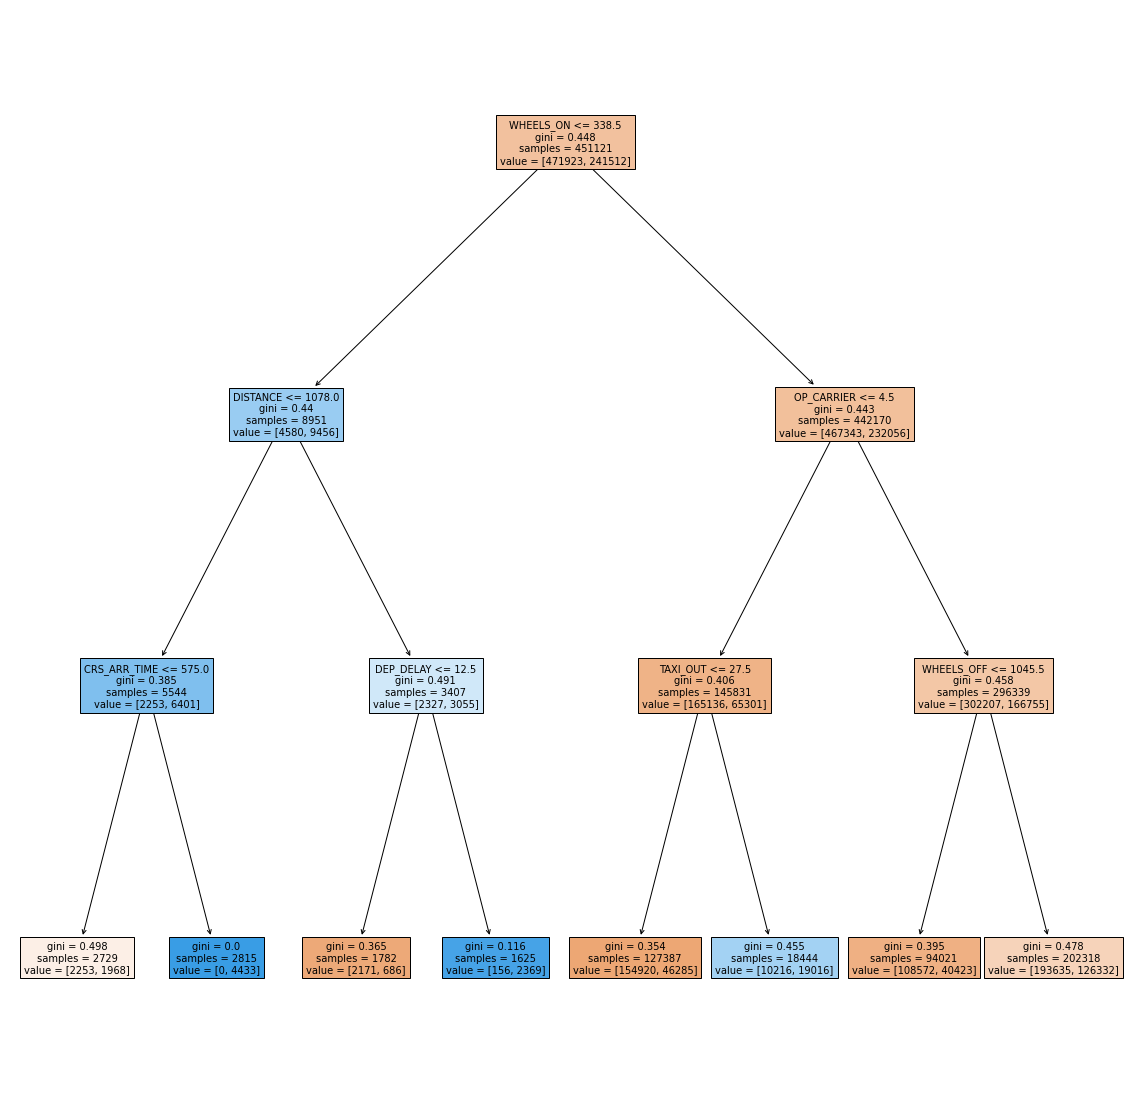

In [22]:
from sklearn import tree
plt.figure(figsize=(20,20))
_ = tree.plot_tree(clf.estimators_[0], feature_names=X.columns, filled=True)


In [23]:
import shap

In [24]:
 # Initialize JavaScript visualizations in notebook environment
 shap.initjs()
 # Define a tree explainer for the built model
 explainer = shap.TreeExplainer(model)
 # obtain shap values for the first row of the test data
 shap_values = explainer.shap_values(X_test.iloc[0])
 shap.force_plot(explainer.expected_value[0], shap_values[0], X_test.iloc[0]) 

In [29]:
 # obtain shap values for the test data
 shap_values = explainer.shap_values(X_test)


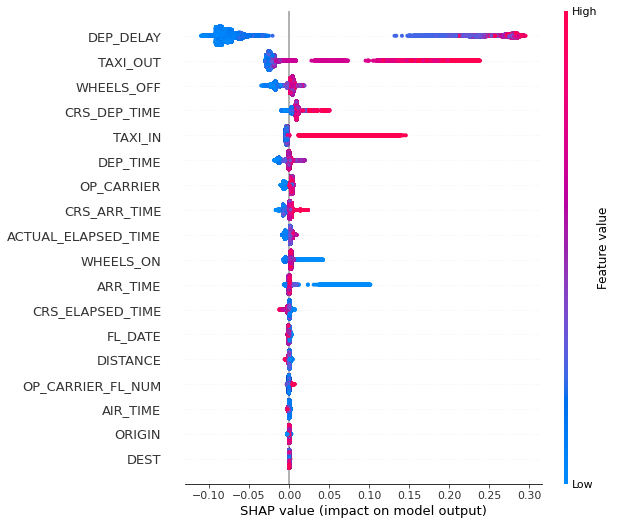

In [26]:
shap.summary_plot(shap_values[1], X_test)

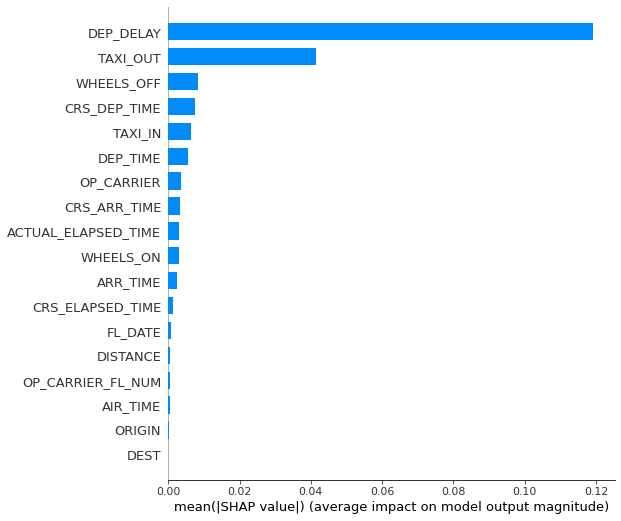

In [27]:
shap.summary_plot(shap_values[1], X_test, plot_type='bar')

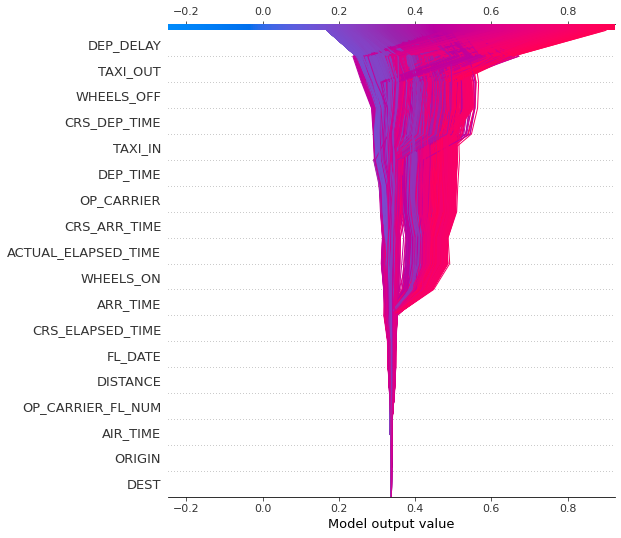

In [28]:
shap.decision_plot(explainer.expected_value[1], shap_values[1], X, ignore_warnings=True)